In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/18_PCA/Exercise/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.shape

(918, 12)

In [5]:
#treating outliers

df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [6]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

In [7]:
df1[df1.RestingBP>(df1.RestingBP.mean()+3*df1.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [8]:
df2 = df1[df1.RestingBP<=(df1.RestingBP.mean()+3*df1.RestingBP.std())]
df2.shape

(908, 12)

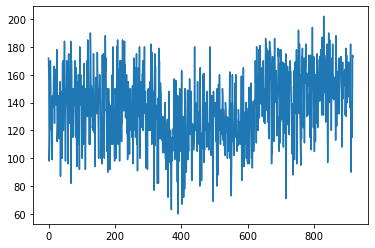

In [9]:
plt.plot(df2.MaxHR)

In [10]:
df2[df2.MaxHR>(df2.MaxHR.mean()+3*df2.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [11]:
df2[df2.Oldpeak>(df2.Oldpeak.mean()+3*df2.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [12]:
df3=df2[df2.Oldpeak<=(df2.Oldpeak.mean()+3*df2.Oldpeak.std())]
df3.shape

(902, 12)

In [13]:
df3.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [14]:
df3.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [15]:
df3.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [16]:
df3.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [17]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
    'N' : 0,
    'Y' : 1   
    },
    inplace=True)
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [18]:
df4.ST_Slope.replace(
{
    'Up' : 0,
    'Flat' : 1,
    'Down' : 2
},
inplace = True)

df4.RestingECG.replace({
    'Normal' : 0,
    'ST' : 1,
    'LVH' : 2
},
inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,0,172,0,0.0,0,0
1,49,F,NAP,160,180,0,0,156,0,1.0,1,1
2,37,M,ATA,130,283,0,1,98,0,0.0,0,0
3,48,F,ASY,138,214,0,0,108,1,1.5,1,1
4,54,M,NAP,150,195,0,0,122,0,0.0,0,0


In [19]:
df5 = pd.get_dummies(df4,drop_first='ignore')
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,0,172,0,0.0,0,0,1,1,0,0
1,49,160,180,0,0,156,0,1.0,1,1,0,0,1,0
2,37,130,283,0,1,98,0,0.0,0,0,1,1,0,0
3,48,138,214,0,0,108,1,1.5,1,1,0,0,0,0
4,54,150,195,0,0,122,0,0.0,0,0,1,0,1,0


In [20]:
X = df5.drop('HeartDisease',axis='columns')
y = df5.HeartDisease


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [28]:
len(X_train)

721

In [29]:
from sklearn.linear_model import LogisticRegression
lf  = LogisticRegression(max_iter=1000)
lf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
lf.score(X_test,y_test)

0.8232044198895028

In [31]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.87105031, -0.28125436, -1.44980299, ..., -0.05488508,
         0.33358846, -0.28328624],
       [-0.76246058, -0.74572385,  1.41584902, ..., -1.27896077,
         0.94919092,  0.06446816],
       [-1.84111038,  0.05457706, -1.57769145, ...,  0.46349604,
         1.2014576 ,  0.52601097],
       ...,
       [ 1.54652939,  0.55218202, -1.04182849, ..., -0.20247092,
        -0.28186617, -0.21560495],
       [-1.87902236, -1.72875417, -0.09350489, ..., -0.95727463,
         0.90171678, -0.99788335],
       [-2.15069147,  0.86472944,  1.26524533, ..., -0.52475064,
         0.12388517,  0.00685026]])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2)
lf1  = LogisticRegression(max_iter=1000)
lf1.fit(X_train_pca,y_train_pca)
lf1.score(X_test_pca,y_test_pca)

0.861878453038674